# SQRA with Lennar Jones Clusters - Convergence analysis

## The Setup
We start with a (1) simulation of a trajectory of the Lennard Jones cluster dynamics for 3 Particles in 2-Space.
The resulting points will be used for a subsampling procedure to obtain the cells for the SQRA.
There are two options:
- The Picking algorith: \
	Pick iteratively the point farthest from all previously picked points. For the adjacency matrix required for the SQRA we use a heuristic to match an expected average number of neighbours by a distance threshold. The Volumes and Areas of the cells are assumed to be uniform.

- Sparse Boxes: \
	We cover the trajectory with a grid of regular boxes. In this regime the adjacency is clear and volumes and areas are constant.
	For the estimation of the (assumedly constant) potential in each box we use the minimum of the correspoding samples.

### Postprocessing of the SQRA:
In order to obtain a 'nice' generator matrix we prune states with outbound rates above a certain thresholds and afterwards (unconnected) states without incoming rates.

## Committor computation
Based on the relative angles of the 3 particles we classify the states into the states: right oriented, left oriented, unoriented.
We then compute the committor function between the left and right orientations.

## Convergence analysis
In order to analyse the convergence of the SQRA we compute the committors for different levels of the sparse box discretization.
We then compute the distances of the committors (of different resolutions) with the finest committor.

For the distance we use the MSE on the support of the finest discretization.

In [1]:
using Revise
using Sqra
using Plots
using Arpack
using LinearAlgebra, Random
plotly(fmt=:png)

┌ Info: Precompiling Sqra [561b40b7-a0ab-4084-b14c-be45599a2ca9]
└ @ Base loading.jl:1342


Plots.PlotlyBackend()

# Simulation

We start by simulation a long trajectory to explore the state space.
We use these samples as a basis for either subsampling with the picking algorithm (`:voronoi`)
or for selecting the sparse boxes for a given discretization level (`ncells` in each direction)

In [3]:
sim = Sqra.run(Sqra.Simulation(nsteps=1_000_00))
dis = Sqra.discretize(Sqra.SpBoxDiscretisation(), sim)

length(picks) = 2829
  0.064589 seconds (473.19 k allocations: 54.829 MiB)
  0.001404 seconds (94 allocations: 1.804 MiB)
sparsity: 2829/46656=0.060635288065843625
pruned 1030 large outbound rates
pruned 67 states without incoming rates


(
⠿⣧⡆⢣⢶⡊⢺⢴⣏⢳⣶⠣⠷⡏⢻⠝⣾⣅⠎⠞⣗⣆⢤⡣⢚⣶⠷⣔⢐⢝⠟⣩⡶⢷⠶⣢⡉⢨⣼⢕
⠬⣉⢟⢕⢿⢝⣜⡂⠸⠛⣵⣪⣴⣏⡧⠨⡎⡳⢟⣅⣬⠲⣎⠍⣵⣭⣙⣛⢶⣤⣞⡒⡞⢹⣺⣯⢼⣲⠘⢂
⡸⠳⣟⢗⣿⣿⣏⣝⣴⠊⢷⢟⣹⣺⣿⣼⡴⣒⡟⣷⣥⣺⡦⣾⡝⣿⡢⡀⢹⢽⠿⣫⡆⡛⠓⢽⣞⡵⣿⢆
⢚⣖⠲⠹⣏⢽⢟⢕⡠⡬⣧⡘⡉⠷⣶⣥⠾⣍⣵⢫⢾⠻⣯⣬⣯⣻⣝⡼⣾⡷⢍⣾⣿⡵⢭⢕⡭⣟⢧⣩
⢯⣙⣶⠂⡰⠛⡀⡮⡿⣯⡿⢻⢕⡎⡣⣫⣟⢷⣗⣑⣆⡮⠌⠹⡯⣬⡨⠯⢟⡫⢫⠁⠻⠝⢶⣦⢜⠂⡞⣓
⠼⡛⡱⣻⣽⢗⣉⠻⣿⣋⣿⢟⣩⣿⠦⣉⡛⠛⢙⢷⡢⣯⡵⠩⡨⢛⣽⣦⠊⢺⣎⡻⣧⡊⠻⣯⣧⡤⡬⠖
⡽⠧⡴⢿⣳⣺⢧⡌⡱⠵⣧⣾⣕⣽⠽⣿⣲⡘⠰⢗⣯⣿⡻⡈⣐⡼⣽⢷⣷⡄⡾⢳⣾⣿⡞⠍⣾⣳⢏⠗
⣟⠖⡉⡋⣛⣿⠜⣿⡭⣪⡌⢣⣷⣧⢿⣷⣁⣵⢷⡋⠯⡻⢟⠽⣷⢚⣡⠑⢿⣾⣿⣟⡙⡹⣟⣢⣴⣉⠪⣣
⠞⢿⢮⡩⢰⢫⡞⢧⢿⣝⣿⠈⣘⠺⢅⣼⢵⣷⡟⣵⡊⠈⢻⠥⢞⣅⣙⠇⣬⢰⣯⡣⢾⣾⠟⠇⣫⣏⣧⠍
⣪⠅⠟⢵⢿⣭⡵⣛⢝⢹⢷⣔⢴⢆⡽⠳⢟⣭⢵⢗⣇⢹⠃⡍⢥⡟⡴⣷⣾⢦⣀⢊⢨⠿⣴⣇⣈⢓⣫⠿
⠹⢽⢢⡛⣡⣻⣾⡓⡨⡽⡬⣮⣯⣿⣯⡣⡊⠈⣍⣙⡑⣬⣹⢻⡯⢡⢖⣋⠺⣾⡞⢊⣭⡂⢩⡹⡿⢶⠘⡬
⠤⡳⡎⠝⣨⣯⡋⣿⣆⡁⡕⡋⡛⠪⣟⡕⠟⡖⡍⠤⣷⣚⢻⣶⣟⠬⡅⠺⠏⢳⣿⣮⣯⢱⢰⡎⢨⣻⣴⣄
⢺⣴⡕⣿⣷⣭⣯⣻⡋⣯⣦⢊⣐⡼⣹⢛⠞⢵⣥⠷⠏⣋⡛⡝⡱⣮⡯⠧⣅⣠⠙⢿⢆⢿⡏⣶⡉⠷⣙⡜
⢙⢧⣷⢸⠈⠪⣓⡽⡦⡎⠳⣿⢷⣟⢅⠚⠷⠜⢴⣯⡼⢱⣡⡉⠯⡏⡿⣯⣾⢛⣓⠈⠺⣛⣉⢾⣲⢉⣉⡡
⣔⢔⠘⣷⣗⣖⢾⡿⡿⡱⣪⣀⠙⠿⣻⣷⢂⣛⠺⣟⣺⣦⢯⣁⠁⣹⣾⢛⢿⣷⣵⡈⡧⡢⣿⣖⢛⣽⠜⡊
⡟⣡⢺⠹⡿⣣⣣⣵⠏⠒⣮⡹⢾⣋⣿⢿⠯⡻⡠⢘⡺⢉⡻⣿⣷⣄⡙⠘⡑⠻⣵⣿⢜⢥⠌⠼⠞⡻⡫⢊
⢼⣏⣞⣉⣬⠩⢟⡿⣟⠆⡩⠻⣾⣿⣗⡨⣺⣷⣦⡖⠣⠻⢏⣛⣬⣕⣾⢢⠩⡫⠖⣕⠿⣧⣭⣒⡤⠸⠦⣦
⠸⣣⡾⣾⣝⣄⢇⢗⠸⣷⡿⣦⡞⠍⠻⣹⠿⠅⠴⢿⣇⡲⡰⠶⢫⣭⣣⣜⢻⢿⣂⡅⢣⢻⠿⢇⣞⣇⣫⡎
⡃⣈⢲⣳⢞⡽⣧⢯⠲⠑⠉⡿⢾⣻⡔⢻⡯⢾⢦⢘⢻⣏⣦⣲⢧⡌⡜⢚⣟⣴⣾⡡⣀⡋⠾⢽⣕⢝⠵⢢
⢖⢟⠲⢀⠻⢟⡍⣳⢾⢩⢢⠏⢯⠕⠮⣢⡍⠟⣯⡞⡒⡤⠐⢿⣓⠼⠇⡸⡲⠡⡫⢊⠨⣧⡫⠾⠱⣃⡻⢎, [91317, 3374, 6348, 42152, 80217, 29368, 25020, 87814, 85988, 62692  …  90163, 66718, 77042, 47365, 31489, 56382, 7786, 90162, 85674, 93258], [-0.1664905039402638 0.018865213368

In [5]:
typeof(dis)

Tuple{SparseArrays.SparseMatrixCSC{Float64, Int64}, Vector{Int64}, Matrix{Float64}, Vector{Float64}}

In [244]:
#method = :voronoi
method = :sb

steps = 2_000_000
sigma=.5

ncells=6
npicks=300

prune=10000

Random.seed!(0)
@time r=Sqra.run(nsteps=steps, method=method, ncells=ncells, npicks=npicks, prune=prune, sigma=sigma, x0=Sqra.x0gen);

Euler Maruyama simulation100%|██████████████████████████| Time: 0:00:06
sparse box picking100%|█████████████████████████████████| Time: 0:00:00
collecting neighbours100%|██████████████████████████████| Time: 0:00:00


length(picks) = 12634
  1.258240 seconds (8.36 M allocations: 1.007 GiB, 8.37% gc time)
  0.173144 seconds (94 allocations: 10.140 MiB, 95.38% gc time)
sparsity: 12634/46656=0.27079046639231824
pruned 506 large outbound rates
pruned 2 states without incoming rates
 11.462859 seconds (100.63 M allocations: 10.135 GiB, 20.42% gc time, 2.16% compilation time)


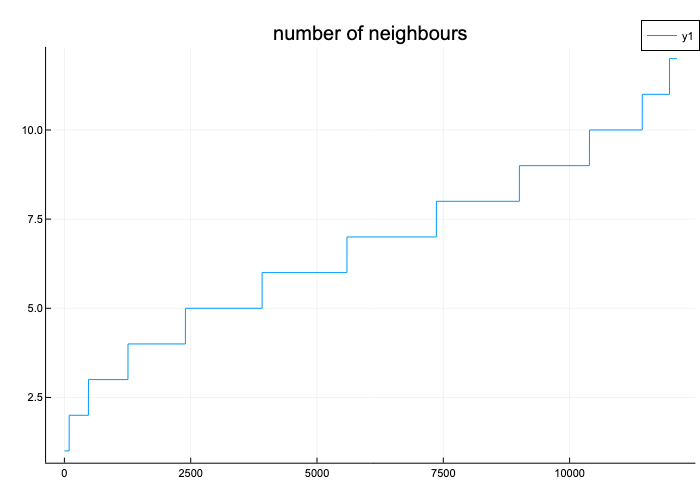

In [240]:
plot(sum(r.Q .> 0, dims=1)|>vec|>sort, title="number of neighbours")

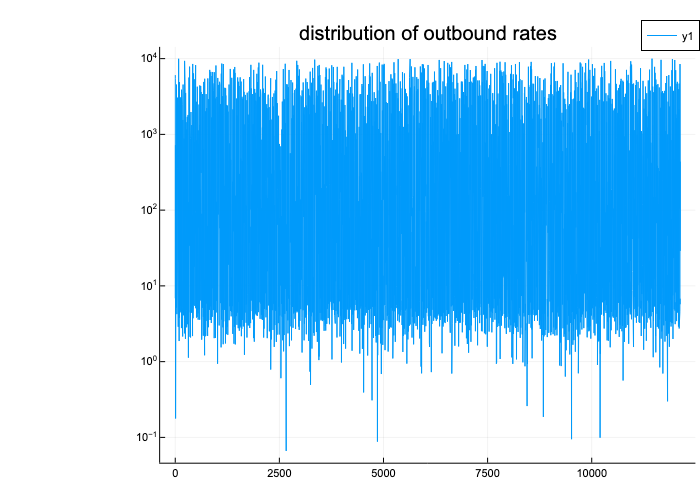

In [135]:
plot(-diag(r.Q), yaxis=:log, title="distribution of outbound rates")

In [136]:
println("size of system")
length(r.Q.nzval), size(r.Q)

size of system


(93738, (12126, 12126))

# Analysis of committor solver convergence

We compare different solvers for the linear system, as well as the solutions of a more pruned system.
Pruning is mainly there to enable solution of the linear committor system.
On the other hand iterative solvers might maybe help to compute ill conditioned systems?
After all the large outbound rates should not play a role in the computation.
We might as well try preconditioning with the diagonal rates!

In [139]:
function err(Q, c, x)
	A, b = Sqra.committor_system(Q, c)
	sum(abs2, A*x - c)
end
# the whole system
cs1 = [Sqra.solve_committor(r.Q, r.classes, method) for method in instances(Sqra.CommittorSolver)]

map(x->err(r.Q, r.classes, x), cs1)

5-element Vector{Float64}:
 1951.0
 1927.9841973899815
 2466.4551518395465
 3793.5902514891495
 1951.0

In [140]:
# subprune the syste

_, pinds = Sqra.prune_Q(r.Q, 100)

QQ = r.Q[pinds, pinds]
bb = r.classes[pinds]

cs2 = [Sqra.solve_committor(QQ, bb, method) for method in instances(Sqra.CommittorSolver)]

map(x->err(QQ, bb, x), cs2)

pruned 5276 large outbound rates
pruned 182 states without incoming rates


5-element Vector{Float64}:
 1377.0
 1376.997227449377
 1377.0990524882432
 1377.0000000000002
 1377.0000000000002

In [141]:
function mixederror(x)
	big = zeros(size(r.Q, 1))
	big[pinds] = x
	err(r.Q, r.classes, BigFloat.(big))
end

map(mixederror, cs2)

5-element Vector{BigFloat}:
 5.830064424669503864065258039739735166667916072147306228028275427439731273466678e+09
 5.83007896689161813738128362775790951803319624322455661904618381971365285097944e+09
 5.832781750446487229012143378374863992222911791565760923951217424517041617871682e+09
 5.830064376777814487835356752835712640664043847347234419490694484513421727440175e+09
 5.830064423298483483039108551151646534017542001838810530490173371991173630598483e+09

# Taking a look at committor solution

In [161]:
# select a solution from above as committor
c = cs1[5];

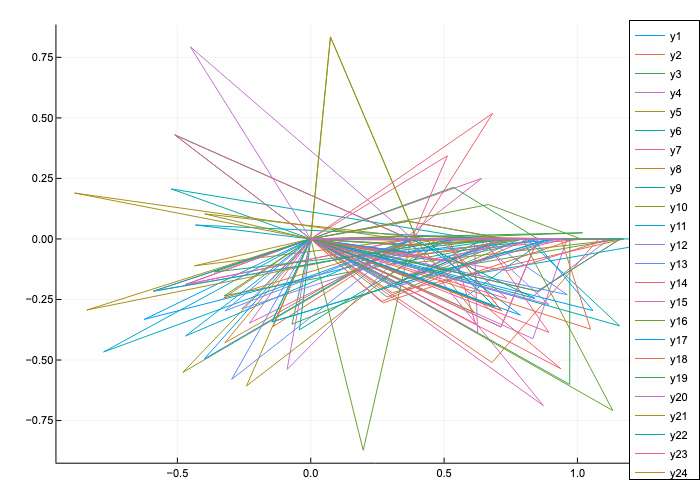

In [166]:
# plot states with a committor value in the defined range
transind = rand(findall((0.1 .<c.<0.2)), 100)
plot()
Sqra.plot_triangles!(Sqra.normalform(r.picks[:, transind]))

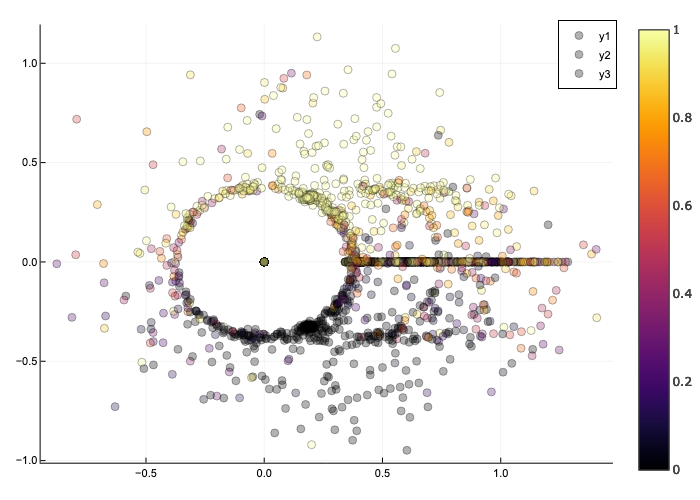

  4.730776 seconds (1.35 M allocations: 90.992 MiB)


In [168]:
# plot the rotated and translated normal form of the LJ clusters and color by committor

plot()
plotint = 1:10:size(r.picks,2)
color = c
let points = r.picks[:, plotint], col = c[plotint]
#let points = r.picks[:, pinds], col = x
	@time Sqra.plot_trajectories(Sqra.normalform(points), alpha=0.3, marker_z=col) |> display;
end 

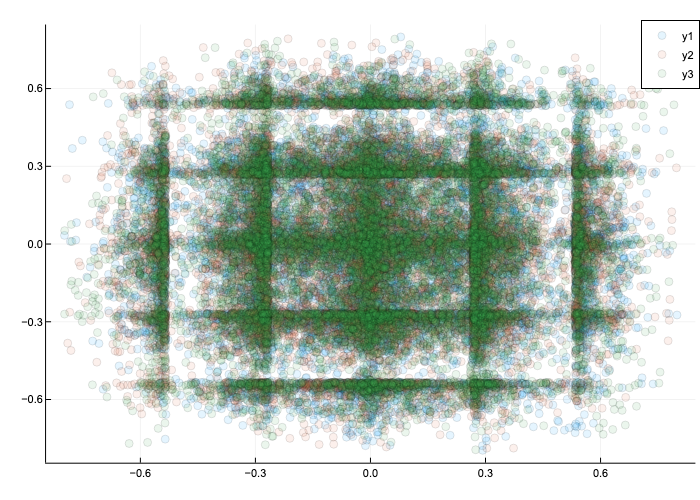

  5.234697 seconds (386.71 k allocations: 44.899 MiB, 1.03% gc time)


In [169]:
# plot the JL cluster states in original coordinates
plot();
@time Sqra.plot_trajectories(r.picks, alpha=0.1) |> display;
#plot_trajectories(r.x[:,1:end], alpha=0.01, markersize=0.5)

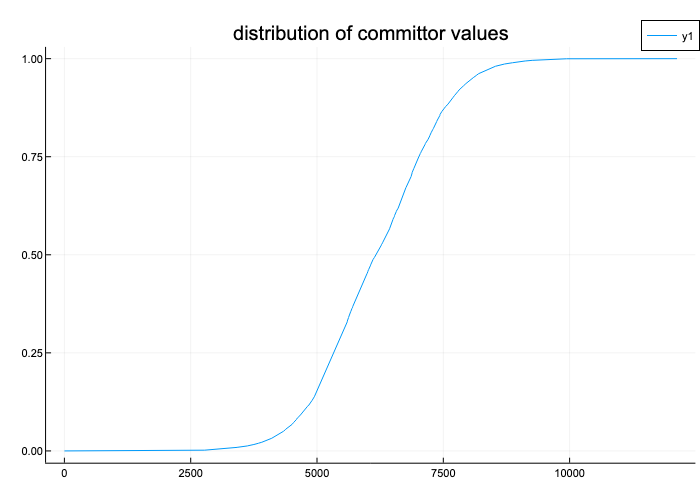

In [170]:
plot(c|>sort, title="distribution of committor values")

# Convergence of committors


In [246]:
runs = []

let x = r.x, 
	u = mapslices(r.x, dims=1) do x
		Sqra.lennard_jones_harmonic(x, epsilon=r.epsilon, sigma=r.r0, harm=r.harm) 
	end |> vec,
	beta = r.beta, 
	boundary = r.boundary,
	prune = r.prune

	for ncells in 3:6
		Q, inds = Sqra.sqra_sparse_boxes(x, u, ncells, beta, boundary)

		Q, pinds = Sqra.prune_Q(Q, prune)
		inds = inds[pinds]
		picks = x[:, inds]
		carts = Sqra.cartesiancoords(picks, ncells, boundary)

		classes = Sqra.classify(picks)
		c = Sqra.solve_committor(Q, classes, Sqra.idrs)

		push!(runs, (carts = carts, c=c))
	end

end

LoadError: type NamedTuple has no field epsilon

In [249]:
r

(neigh = 18, cartesians = [3 6 … 1 1; 1 2 … 6 3; … ; 5 5 … 3 5; 4 5 … 3 2], c = nothing, npicks = 300, classes = [-1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  -1.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], method = :sb, boundary = [-0.8 0.8; -0.8 0.8; … ; -0.8 0.8; -0.8 0.8], sigma = 0.5, ncells = 6, x = [0.19920158482463968 0.20938030651221284 … -0.17194296689212948 -0.16781133684377658; 0.13789462153196408 0.15121847849641643 … -0.04299400053171757 -0.030595285050176623; … ; 0.06778720715969005 0.07632941907589609 … 0.2674587215843169 0.2946763636202318; -0.2112155752270007 -0.20618413722322274 … 0.00885528488961107 0.013054044888036888], picks = [-0.00938365766359332 0.5644878056019053 … -0.6836825529100713 -0.5890321549930826; -0.5762941165442956 -0.295909354917386 … 0.5427057685322156 -0.09502307443758673; … ; 0.2681914077971146 0.5074178554775775 … -0.05549737697522243 0.3123464224729521; 0.0010537669982941108 0.42761722693339244 … -0.10018270280187067 -0.275763935

In [241]:
fine = runs[end]

map(runs) do run
	Sqra.sp_mse(run.c, fine.c, run.carts, fine.cartesians, run.r.ncells,  fine.r.ncells)
end


LoadError: type NamedTuple has no field cartesians

LoadError: syntax: unexpected semicolon in array expression around In[212]:1

In [215]:
Sqra.sp_mse([1],[2], ones(1,1), ones(1,1)*2, 1, 3)

0.33333333333333326

In [201]:
runs[1].r.cartesians

6×673 Matrix{Int64}:
 1  1  2  2  3  3  2  3  3  1  1  3  1  …  1  1  1  1  1  2  2  2  3  1  3  3
 2  3  2  3  1  3  2  3  2  1  2  3  3     2  3  1  3  1  3  1  1  1  2  1  1
 1  1  1  1  1  3  2  1  3  2  3  2  2     2  1  3  2  2  2  1  2  2  1  3  2
 2  2  3  1  2  2  2  3  3  1  3  3  1     1  3  2  2  1  3  2  3  1  3  2  2
 2  1  1  3  1  1  2  3  3  1  1  1  2     3  1  1  2  3  3  2  3  3  3  2  3
 3  3  2  3  3  2  1  2  3  2  3  2  1  …  3  2  3  1  1  2  1  3  1  2  3  2

In [217]:
let run = runs[end]
Sqra.sp_mse(run.c, fine.c, run.r.cartesians, fine.r.cartesians, run.r.ncells,  fine.r.ncells)
end

LoadError: BoundsError: attempt to access 11826-element Vector{Float64} at index [12259]

# Convergence of picking, Part 1
We analyse how the number of boxes increases with growing sample size and resolution

In [251]:
]add Parameters

   Resolving package versions...
    Updating `~/Documents/code/sqra.jl/notebooks/Project.toml`
  [d96e819e] + Parameters v0.12.2
  No Changes to `~/Documents/code/sqra.jl/notebooks/Manifest.toml`
Precompiling project...
  ✓ SparseMatricesCSR
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  ✗ Sqra
  4 dependencies successfully precompiled in 49 seconds (151 already precompiled)
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the package


sparse box picking100%|█████████████████████████████████| Time: 0:00:04


length(picks) = 713


sparse box picking100%|█████████████████████████████████| Time: 0:00:04


length(picks) = 3204


sparse box picking100%|█████████████████████████████████| Time: 0:00:04


length(picks) = 9194


sparse box picking100%|█████████████████████████████████| Time: 0:00:04
collecting neighbours100%|██████████████████████████████| Time: 0:00:00


length(picks) = 20183


sparse box picking100%|█████████████████████████████████| Time: 0:00:04
collecting neighbours100%|██████████████████████████████| Time: 0:00:05


length(picks) = 69151


sparse box picking100%|█████████████████████████████████| Time: 0:00:04
collecting neighbours100%|██████████████████████████████| Time: 0:00:27


length(picks) = 160135


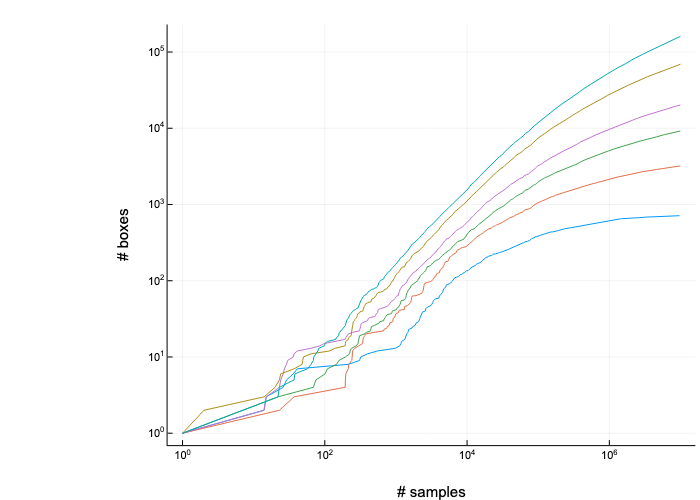

In [21]:
plot()
for n in [3,4,5,6,8,10]
    _, _, order = Sqra.sparseboxpick(r.x, n, ones(size(r.x,2)), r.boundary)
    plot!(order, 1:length(order), )
    accel =  (order[end]-order[end-10]) / 10
    #println(" $(length(order)/size(r.x, 2)  / accel * 100) % verbesserung pro prozent ")
end
plot!(legend=false, xlabel="# samples", ylabel="# boxes", yaxis=:log, xaxis=:log)

# --- OLD SNIPPETS --- #

# Generator preprocessing

In [9]:
cutoff = 3
prune = Inf

Q, pinds = Sqra.prune_Q(r.Q,Inf)

Q.nzval[Q.nzval.>cutoff] .= cutoff
Q = Sqra.fixdiagonal(Q)

pruned 0 large outbound rates
pruned 0 states without incoming rates


12541×12541 SparseArrays.SparseMatrixCSC{Float64, Int64} with 99367 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣏⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⡿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿

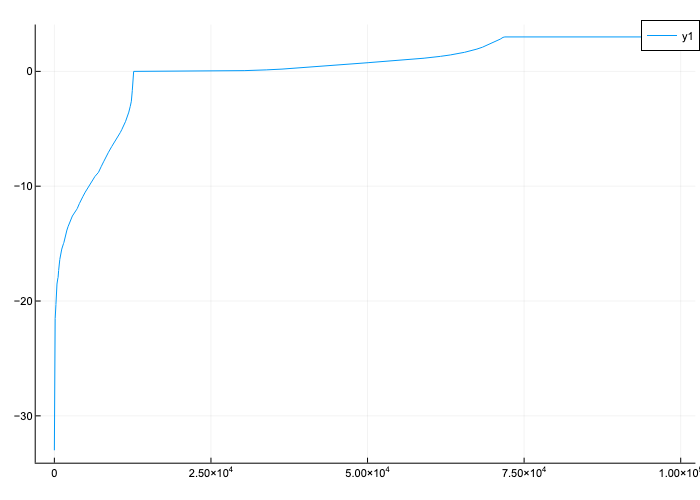

In [10]:
plot((Q.nzval|>sort))

# Committor convergence

In [11]:
Sqra.solve_committor(Q, r.classes[pinds])

LoadError: SingularException(0)

# Spectrum

In [12]:
@time evals, evecs = eigs(Q, which=:LR, maxiter=10000, tol=10)

  2.087857 seconds (4.48 M allocations: 273.488 MiB, 19.26% gc time, 99.05% compilation time)


(ComplexF64[-0.1475671764122306 + 0.0im, -0.7966261258484162 + 0.0im, -1.8944664837860472 + 0.0im, -3.2074719257932913 + 0.0im, -4.4945711114892735 + 0.0im, -6.043124274587199 + 0.0im], ComplexF64[-0.010705250976983669 + 0.0im 0.005518016661157727 + 0.0im … -0.0028558517423887216 + 0.0im 0.0034931182286626673 + 0.0im; -0.013898116354586501 + 0.0im 0.014670317939690276 + 0.0im … 0.002544949149689466 + 0.0im 0.0038144768680137583 + 0.0im; … ; -0.006333613260688547 + 0.0im 0.0045137213484804165 + 0.0im … -0.01626068251582685 + 0.0im -0.002602216051200564 + 0.0im; -0.0081162657879794 + 0.0im 0.001858681185873747 + 0.0im … -0.006749717318176673 + 0.0im 4.865746648047894e-5 + 0.0im], 6, 1, 20, [0.028421907389718715, -0.06938841874877381, -0.1473804498062421, -0.0828561532112862, -0.01905168086002779, 0.0635233506375137, -0.012358328049129638, 0.0400340581663493, -0.008171478918241487, 0.012414471024498887  …  0.015843549068211803, 0.04284768069297001, 0.026374072595923958, 0.0204594852064038

In [13]:
evals

6-element Vector{ComplexF64}:
 -0.1475671764122306 + 0.0im
 -0.7966261258484162 + 0.0im
 -1.8944664837860472 + 0.0im
 -3.2074719257932913 + 0.0im
 -4.4945711114892735 + 0.0im
  -6.043124274587199 + 0.0im

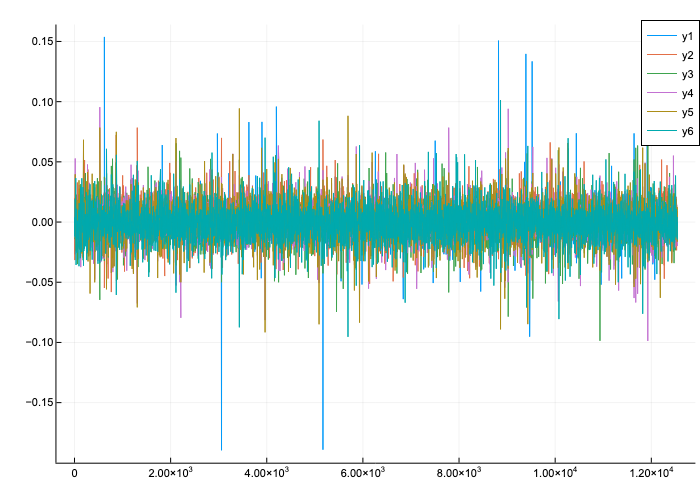

In [14]:
plot(evecs[:,:].|>real)
#plot!(r.classes, alpha=0.5)

# Cell analysis

In [15]:
prob = argmin(diag(r.Q))

5497

In [16]:
@show r.Q[prob,:]
neighs = r.Q[prob,:].nzind;

r.Q[prob, :] =   [416  ]  =  2.85995e291
  [4626 ]  =  3.54671e291
  [4845 ]  =  1.22278e289
  [5497 ]  =  -1.24125e292
  [5541 ]  =  2.51031e291
  [6510 ]  =  5.78385e289
  [10105]  =  3.37218e291
  [11683]  =  5.32815e289


In [17]:
@show r.us[prob]
r.us[neighs]

r.us[prob] = 165.02666398119146


8-element Vector{Float64}:
  -2.7491025397060844
  -2.802906371254066
  -1.385390370968821
 165.02666398119146
  -2.7165030890058035
  -1.7738762209598666
  -2.7902916316770408
  -1.753360044275069

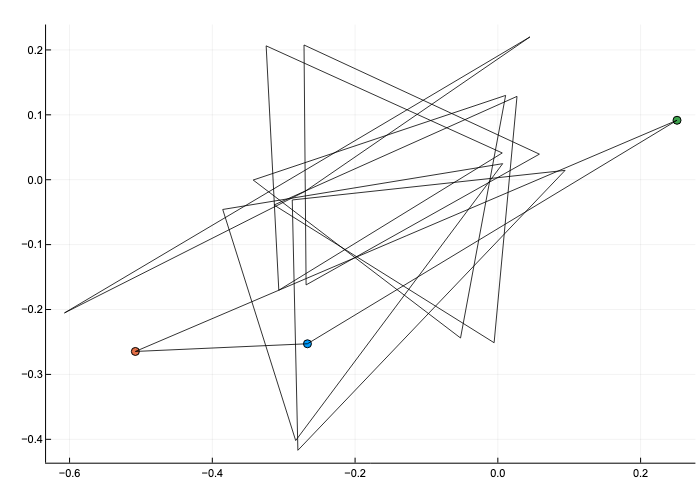

In [18]:
plot(); Sqra.plot_trajectories(r.picks[:,prob])
Sqra.plot_triangles!(r.picks[:, neighs], color=:black, alpha=0.8, legend=false)

# Spectrum again

In [19]:
evals, evecs = eigs(r.Q, which=:SM, nev=6)#, check=0, maxiter=1000, tol=0)
evecs = real.(evecs)
evals

LoadError: SingularException(0)

In [20]:
evecs

12541×6 Matrix{ComplexF64}:
   -0.0107053+0.0im   0.00551802+0.0im  …   0.00349312+0.0im
   -0.0138981+0.0im    0.0146703+0.0im      0.00381448+0.0im
  -0.00307447+0.0im    0.0039833+0.0im      -0.0106567+0.0im
  -0.00955884+0.0im   0.00317276+0.0im      0.00738616+0.0im
  -0.00545934+0.0im   0.00876829+0.0im      -0.0120584+0.0im
   0.00705766+0.0im    0.0200365+0.0im  …  -0.00422746+0.0im
   -0.0267979+0.0im   -0.0315819+0.0im      0.00381682+0.0im
   0.00276322+0.0im   0.00588531+0.0im      0.00104372+0.0im
  -0.00595206+0.0im   0.00290616+0.0im      0.00480697+0.0im
  -0.00392029+0.0im    0.0111989+0.0im     -0.00169179+0.0im
  -0.00501349+0.0im   0.00316529+0.0im  …  -0.00280449+0.0im
  -0.00598821+0.0im   0.00300475+0.0im     -0.00490362+0.0im
   -0.0111979+0.0im   0.00446742+0.0im       0.0188605+0.0im
             ⋮                          ⋱             ⋮
  -0.00821513+0.0im    0.0102204+0.0im     -0.00967229+0.0im
   -0.0058193+0.0im  -4.95268e-5+0.0im  …  -5.47581e-5+0.0im
 

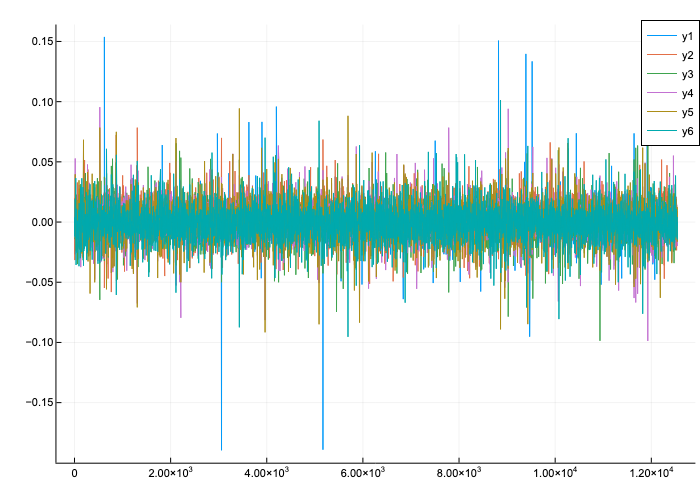

In [21]:
plot(real.(evecs))

In [22]:
step=100
for evec in 1:length(evals)

    col = real.(evecs[:,evec])[1:step:end]
    data = center[:,1:step:end]
    plot();
    plot_trajectories(normalform(data), alpha=0.3, marker_z=col, clims=(-1,1).*std(col), seriescolor=:bwr) |> display

    scatter(data[1,:], data[2,:], alpha=0.3, marker_z=col, clims=(-1,1).*std(col), seriescolor=:bwr) |> display
end

LoadError: MethodError: no method matching axes(::typeof(center), ::Int64)
[0mClosest candidates are:
[0m  axes([91m::RecipesPipeline.Volume[39m, ::Any...) at /Users/alex/.julia/packages/RecipesPipeline/a80Nu/src/utils.jl:108
[0m  axes([91m::Base.Broadcast.Broadcasted{var"#s832", var"#s831", F, Args} where {var"#s832", var"#s831"<:(Tuple{Vararg{T, N}} where T), F, Args<:Tuple}[39m, ::Integer) where N at broadcast.jl:212
[0m  axes([91m::Number[39m, ::Integer) at number.jl:81
[0m  ...